# Prueba paquete OSMnx

# [OSMnx features demo](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/00-osmnx-features-demo.ipynb)

Author: [Geoff Boeing](https://geoffboeing.com/)

Get street networks and other spatial data anywhere in the world from OpenStreetMap then analyze and visualize them.

More info:

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [Documentation and install instructions](https://osmnx.readthedocs.io)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Journal article and citation info](http://geoffboeing.com/publications/osmnx-complex-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)

In [1]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
%matplotlib inline
ox.__version__

'0.11.3'

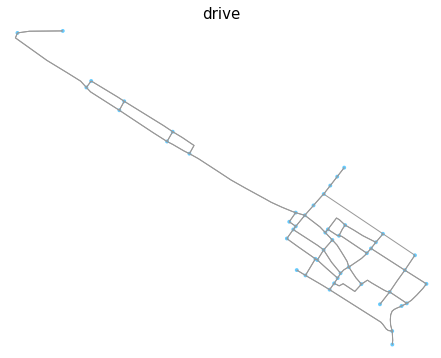

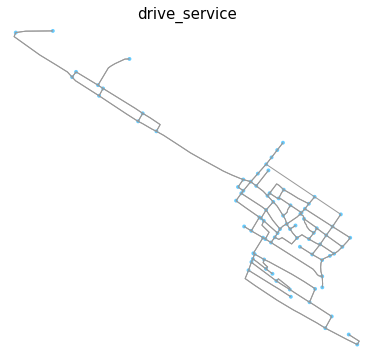

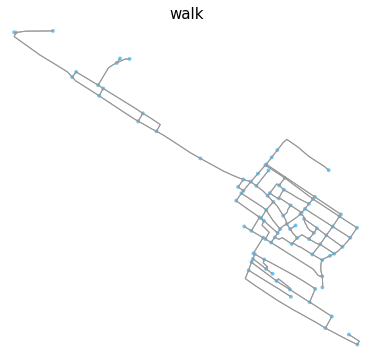

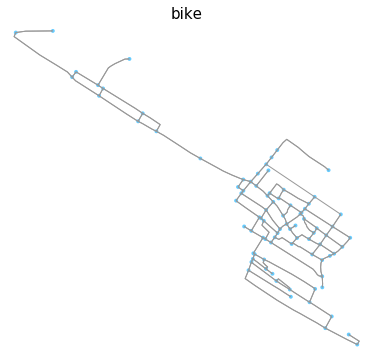

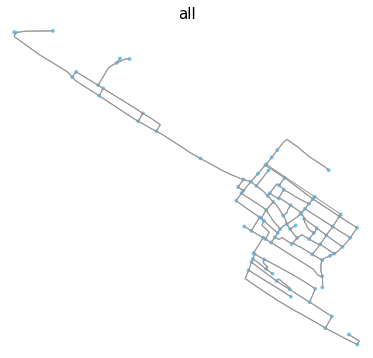

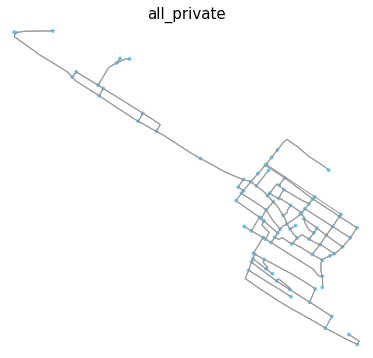

In [3]:
#prueba tipos de redes
tipos=['drive','drive_service','walk','bike','all','all_private']

for tipo in tipos:
    G1 = ox.graph_from_place('Villa 31, Buenos Aires, AR', network_type=tipo)
    fig, ax = ox.plot_graph(G1,show=False, close=False)
    ax.set_title(tipo, fontsize=15)

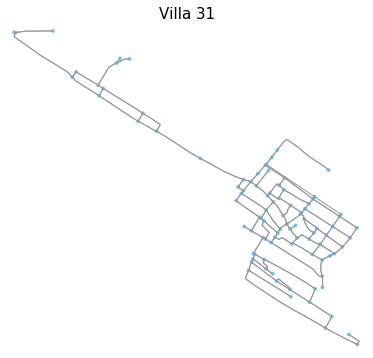

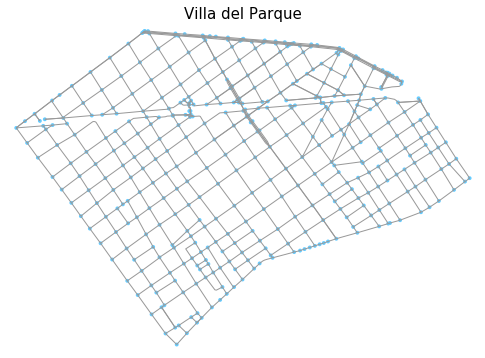

In [19]:
# get a graph for some city
G1_name='Villa 31'
G2_name='Villa del Parque'
tipo='all'
G1 = ox.graph_from_place(G1_name+', Buenos Aires, Argentina', network_type=tipo)
G2 = ox.graph_from_place(G2_name+', Buenos Aires, Argentina', network_type=tipo)
fig, ax = ox.plot_graph(G1,show=False, close=False)
ax.set_title(G1_name,fontsize=15)
fig, ax = ox.plot_graph(G2,show=False, close=False)
ax.set_title(G2_name,fontsize=15);

In [20]:
# what sized area does our network cover in square meters?
G1_proj = ox.project_graph(G1)
nodes_proj_G1 = ox.graph_to_gdfs(G1_proj, edges=False)
graph_area_m_G1 = nodes_proj_G1.unary_union.convex_hull.area
print('Área de',G1_name,': ',round(graph_area_m_G1,2))

G2_proj=ox.project_graph(G2)
nodes_proj_G2=ox.graph_to_gdfs(G2_proj, edges=False)
graph_area_m_G2 = nodes_proj_G2.unary_union.convex_hull.area
print('Área de',G2_name,': ',round(graph_area_m_G2,2))

Área de Villa 31 :  404674.93
Área de Villa del Parque :  3598024.31


In [21]:
# show some basic stats about the network
print(G1_name)
ox.basic_stats(G1_proj, area=graph_area_m_G1, clean_intersects=True, circuity_dist='euclidean')

Villa 31


{'n': 96,
 'm': 256,
 'k_avg': 5.333333333333333,
 'intersection_count': 88,
 'streets_per_node_avg': 2.96875,
 'streets_per_node_counts': {0: 0, 1: 8, 2: 0, 3: 75, 4: 13},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.08333333333333333,
  2: 0.0,
  3: 0.78125,
  4: 0.13541666666666666},
 'edge_length_total': 14865.662000000011,
 'edge_length_avg': 58.068992187500044,
 'street_length_total': 7583.548000000001,
 'street_length_avg': 58.787193798449614,
 'street_segments_count': 129,
 'node_density_km': 237.22744297564324,
 'intersection_density_km': 217.45848939433964,
 'edge_density_km': 36734.82275416864,
 'street_density_km': 18739.851049198474,
 'circuity_avg': 1.0242465845568482,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 47,
 'clean_intersection_density_km': 116.14260229015868}

In [22]:
# show some basic stats about the network
print(G2_name)
ox.basic_stats(G2_proj, area=graph_area_m_G2, clean_intersects=True, circuity_dist='euclidean')

Villa del Parque


{'n': 443,
 'm': 845,
 'k_avg': 3.81489841986456,
 'intersection_count': 436,
 'streets_per_node_avg': 3.625282167042889,
 'streets_per_node_counts': {0: 0, 1: 7, 2: 1, 3: 157, 4: 266, 5: 10, 6: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.01580135440180587,
  2: 0.002257336343115124,
  3: 0.3544018058690745,
  4: 0.600451467268623,
  5: 0.022573363431151242,
  6: 0.004514672686230248},
 'edge_length_total': 77931.42900000005,
 'edge_length_avg': 92.22654319526633,
 'street_length_total': 71199.135,
 'street_length_avg': 93.68307236842105,
 'street_segments_count': 760,
 'node_density_km': 123.12312574857692,
 'intersection_density_km': 121.17761360356555,
 'edge_density_km': 21659.505942513093,
 'street_density_km': 19788.397408114906,
 'circuity_avg': 1.0035647926414812,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 343,
 'clean_intersection_density_km': 95.3300951055573}

stats documentation: https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats

In [23]:
# see more stats (mostly topological stuff) with extended_stats
more_stats_G1 = ox.extended_stats(G1, ecc=True, bc=True, cc=True) #use arguments to turn other toplogical analyses on/off
more_stats_G2 = ox.extended_stats(G2, ecc=True, bc=True, cc=True)
for key in sorted(more_stats_G1.keys()):
    print(key)

avg_neighbor_degree
avg_neighbor_degree_avg
avg_weighted_neighbor_degree
avg_weighted_neighbor_degree_avg
betweenness_centrality
betweenness_centrality_avg
center
closeness_centrality
closeness_centrality_avg
clustering_coefficient
clustering_coefficient_avg
clustering_coefficient_weighted
clustering_coefficient_weighted_avg
degree_centrality
degree_centrality_avg
diameter
eccentricity
pagerank
pagerank_max
pagerank_max_node
pagerank_min
pagerank_min_node
periphery
radius


In [24]:
# pull up some stat's value 
# vemos cuánto están conectados los nodos entre sí. Si es 1, todos los nodos se conectan con todos
print('Coeficiente de agrupamiento\n')
print(G1_name+':', more_stats_G1['clustering_coefficient_avg'])
print(G2_name+':',more_stats_G2['clustering_coefficient_avg'])

Coeficiente de agrupamiento

Villa 31: 0.020833333333333332
Villa del Parque: 0.04085778781038375


In [26]:
# save graph to disk as shapefile (for GIS) or graphml file (for gephi etc) 
# se crea en carpeta "data"
ox.save_graph_shapefile(G1, filename='mynetwork_shapefile')
ox.save_graphml(G1, filename='mynetwork.graphml')

## Visualize street centrality

In [27]:
# edge closeness centrality: convert graph to line graph so edges become nodes and vice versa
edge_centrality_G1 = nx.closeness_centrality(nx.line_graph(G1))
edge_centrality_G2 = nx.closeness_centrality(nx.line_graph(G2))

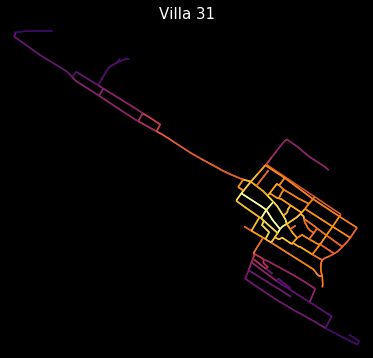

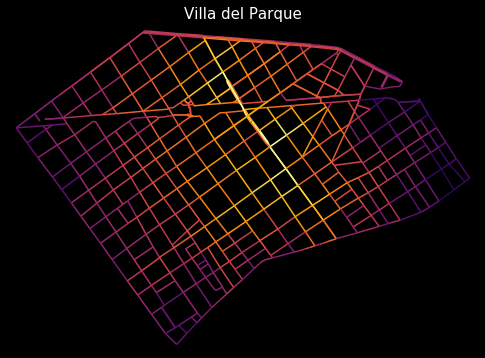

In [28]:
# list of edge values for the orginal graph
G_dic = {G1:G1_name, G2:G2_name}
for edge_centrality,G in zip([edge_centrality_G1,edge_centrality_G2],G_dic):
    ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

    # color scale converted to list of colors for graph edges
    norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
    cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
    ec = [cmap.to_rgba(cl) for cl in ev]

    # color the edges in the original graph with closeness centralities in the line graph
    fig, ax = ox.plot_graph(G, bgcolor='k', axis_off=True, node_size=0,
                            edge_color=ec, edge_linewidth=1.5, edge_alpha=1,
                           show=False, close=False)
    ax.set_title(G_dic[G],fontsize=15,color='white');

## Routing

In [29]:
# get the nearest network node to each point
# orig_node = ox.get_nearest_node(G, (37.828903, -122.245846))
# dest_node = ox.get_nearest_node(G, (37.812303, -122.215006))
orig_node_G1 = 2150574788 #seleccionados al azar con G1.nodes
dest_node_G1 = 1618351674
orig_node_G2 = 4059858067
dest_node_G2 = 1503433051

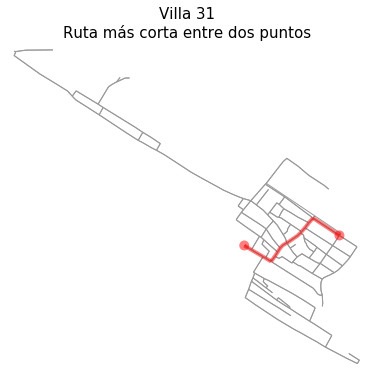

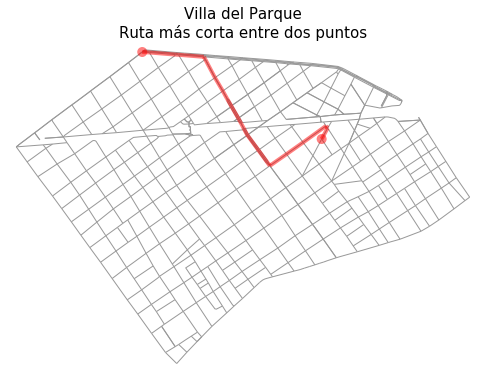

In [30]:
# find the route between these nodes then plot it
route_G1 = nx.shortest_path(G1, orig_node_G1, dest_node_G1, weight='length')
fig, ax = ox.plot_graph_route(G1, route_G1, node_size=0, show=False, close=False)
ax.set_title(G1_name+'\nRuta más corta entre dos puntos',fontsize=15)

route_G2 = nx.shortest_path(G2, orig_node_G2, dest_node_G2, weight='length')
fig, ax = ox.plot_graph_route(G2, route_G2, node_size=0, show=False, close=False)
ax.set_title(G2_name+'\nRuta más corta entre dos puntos',fontsize=15);

In [34]:
# how long is our route in meters?
print('Largo rutas')
print('Ruta {}: '.format(G1_name),nx.shortest_path_length(G1, orig_node_G1, dest_node_G1, weight='length'))
print('Ruta {}: '.format(G2_name),nx.shortest_path_length(G2, orig_node_G2, dest_node_G2, weight='length'))

Largo rutas
Ruta Villa 31:  416.52399999999994
Ruta Villa del Parque:  1774.9669999999999


In [35]:
# how far is it between these two nodes as the crow flies?
print('Ruta {} a vuelo de pájaro: '.format(G1_name),
      ox.great_circle_vec(G1.nodes[orig_node_G1]['y'], G1.nodes[orig_node_G1]['x'],
                          G1.nodes[dest_node_G1]['y'], G1.nodes[dest_node_G1]['x']))
print('Ruta {} a vuelo de pájaro: '.format(G2_name),
      ox.great_circle_vec(G2.nodes[orig_node_G2]['y'], G2.nodes[orig_node_G2]['x'],
                          G2.nodes[dest_node_G2]['y'], G2.nodes[dest_node_G2]['x']))

Ruta Villa 31 a vuelo de pájaro:  321.0098353956697
Ruta Villa del Parque a vuelo de pájaro:  1293.9407064974248


## Get networks other ways

make queries less ambiguous to help the geocoder out if it's not finding what you're looking for

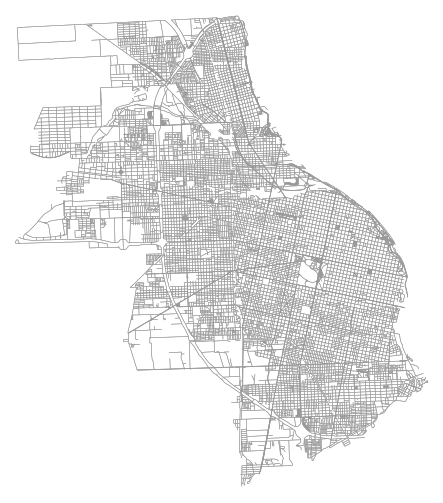

In [45]:
# make query an unambiguous dict to help the geocoder find specifically what you're looking for
place = {'city' : 'Rosario',
         'state' : 'Santa Fe',
         'country' : 'Argentina'}

G = ox.graph_from_place(place, network_type='walk')
fig, ax = ox.plot_graph(G, fig_height=12, node_size=0, edge_linewidth=0.5)

In [ ]:
# add elevation to nodes automatically, calculate edge grades, plot network
#error con google elevation api key
from keys import google_elevation_api_key
G = ox.add_node_elevations(G, api_key=google_elevation_api_key)
G = ox.add_edge_grades(G)
nc = ox.get_node_colors_by_attr(G, 'elevation', cmap='plasma', num_bins=20)
fig, ax = ox.plot_graph(G, fig_height=6, node_color=nc, node_size=12, node_zorder=2, edge_color='#dddddd')

example: create impedance functions to route around hills: https://github.com/gboeing/osmnx-examples/blob/master/notebooks/12-node-elevations-edge-grades.ipynb

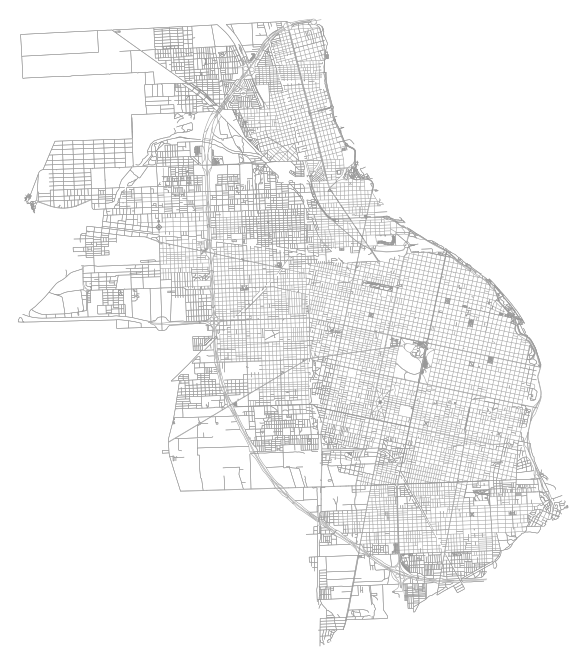

In [52]:
# you can get networks anywhere in the world
G = ox.graph_from_place('Rosario, Argentina', network_type='all')
fig, ax = ox.plot_graph(G, fig_height=12, node_size=0, edge_linewidth=0.5)

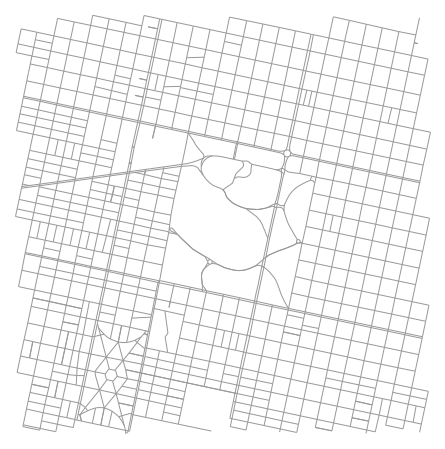

In [53]:
# or get network by coordinates, bounding box, or any custom polygon shape
# useful when OSM just doesn't have a polygon for the place you want
#colocamos el punto en el centro del parque independencia (Rosario) y pedimos una milla a la redonda.
wurster_hall = (-32.959496, -60.661270)
one_mile = 1609 #meters
G = ox.graph_from_point(wurster_hall, distance=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G, fig_height=8, node_size=0)

examples of getting networks by coordinates, bounding box, or any custom polygon shape: https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb

## Get shapefiles from OpenStreetMap
OSMnx lets you download spatial "place boundary" geometries from OpenStreetMap, save them to shapefiles, project them, and plot them.

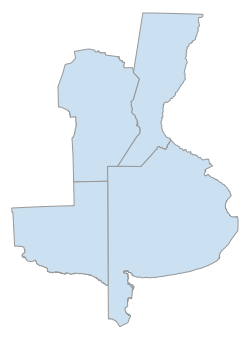

In [61]:
# get the boundary polygons for multiple cities, save as shapefile, project to UTM, and plot
place_names = ['Provincia de Córdoba, Argentina', 
               'Santa Fe, Argentina',
               'Provincia de Buenos Aires, Argentina',
               'La Pampa, Argentina']
east_bay = ox.gdf_from_places(place_names)
ox.save_gdf_shapefile(east_bay)
east_bay = ox.project_gdf(east_bay)
fig, ax = ox.plot_shape(east_bay)

## Get other infrastructure types

like rail or electric grids

In [76]:
import geopandas as gpd

In [77]:
caba = gpd.read_file('https://bitsandbricks.github.io/data/CABA_rc.geojson')
caba=caba[['RADIO_ID', 'BARRIO', 'AREA_KM2', 'geometry']]
# caba = caba.to_crs(crs = "+proj=tmerc +lat_0=-34.629269 +lon_0=-58.4633 +k=0.9999980000000001 +x_0=100000 +y_0=100000 +ellps=intl +units=m +no_defs")

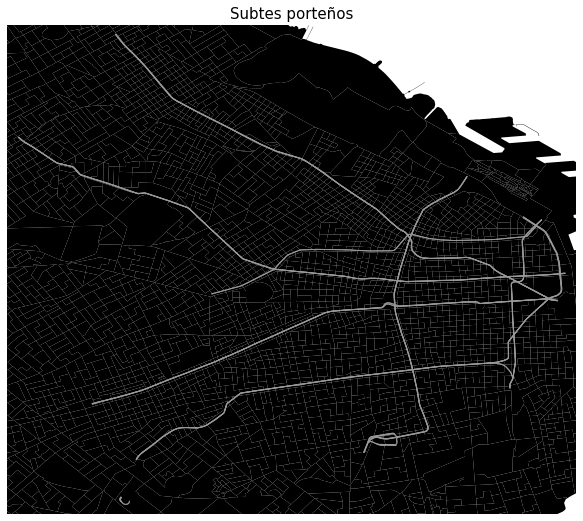

In [88]:
# get rail network
# note this is rail *infrastructure* and thus includes crossovers, sidings, spurs, yards, etc
# for station-based rail network, you should prob download a station adjacency matrix elsewhere
G = ox.graph_from_place('Ciudad de Buenos Aires, Argentina',
                        retain_all=True, truncate_by_edge=True, simplify=False,
                        network_type='none', infrastructure='way["railway"~"subway"]')

fig, ax = ox.plot_graph(G, fig_height=9, node_size=0, show=False, close=False)
caba.plot(ax=ax,color='k')
ax.set_title('Subtes porteños',fontsize=15);